In [115]:
import Pkg
Pkg.activate(@__DIR__)
Pkg.status()

  Activating project at `~/Documents/Carnegie-Mellon/Chatterjee Group/Programming/heisenberg-model/Biquadratic.jl/analysis`


Status `~/Documents/Carnegie-Mellon/Chatterjee Group/Programming/heisenberg-model/Biquadratic.jl/analysis/Project.toml`
  [13f3f980] CairoMakie v0.15.3
  [780c37f4] Carlo v0.2.4
  [a93c6f00] DataFrames v1.7.0
  [f67ccb44] HDF5 v0.17.2


In [116]:
using CairoMakie
using Carlo.ResultTools
using DataFrames
using HDF5
using LinearAlgebra

In [117]:
# Parse DataFrame from ResultTools into more readily useable form
cleandata(filepath::AbstractString) = select(
    DataFrame(ResultTools.dataframe(filepath)),
    [:J1, :K, :Lx, :Ly, :Mag, :Energy, :Dx0, :Dy0],
)

cleandata (generic function with 1 method)

In [118]:
function generatePlot(data::AbstractDataFrame, x, y; fig=Figure(), fig_pos=(1,1),
                      title, xlabel, ylabel)
    fig[fig_pos...] = Axis(fig; title, xlabel, ylabel)

    vals = getfield.(data[:, y], :val)
    errs = getfield.(data[:, y], :err)
    scatter!(data[:, x], vals)
    errorbars!(data[:, x], vals, errs)

    return fig
end

function generatePlot(data::GroupedDataFrame, x, y; fig=Figure(), fig_pos=(1,1),
                      title, xlabel, ylabel)
    fig = Figure()
    fig[fig_pos...] = Axis(fig; title, xlabel, ylabel)

    for key in keys(data)
        group = data[key]
        vals = getfield.(group[:, y], :val)
        errs = getfield.(group[:, y], :err)
        scatter!(group[:, x], vals, label="$(NamedTuple(key))")
        errorbars!(group[:, x], vals, errs)
    end

    axislegend()

    return fig
end

generatePlot (generic function with 2 methods)

In [119]:
jobname = "j1-sweep"
data = groupby(cleandata("../jobs/" * jobname * ".results.json"), [:K])

Row,J1,K,Lx,Ly,Mag,Energy,Dx0,Dy0
,Float64,Float64,Int64,Int64,Measurem…,Measurem…,Measurem…,Measurem…
1,-2.0,0.2,40,40,0.26747±0.00082,-3.76904±0.0004,0.89583±0.00029,0.90742±0.0003
2,-1.9,0.2,40,40,0.0846±0.0013,-3.58724±0.00039,0.87405±0.00023,0.88602±0.00011
3,-1.8,0.2,40,40,0.1536±0.0014,-3.41327±0.00041,0.83511±0.00049,0.84933±0.00048
4,-1.7,0.2,40,40,0.0439±0.0009,-3.26005±0.0004,0.77515±0.00015,0.80144±0.0003
5,-1.6,0.2,40,40,0.02411±0.00092,-3.1001±0.00032,0.70278±0.00027,0.7497±0.00025
6,-1.5,0.2,40,40,0.0485±0.0011,-2.95922±0.00036,0.67876±0.00045,0.70956±0.0006
7,-1.4,0.2,40,40,0.0264±0.0016,-2.82514±0.00016,0.62499±0.00032,0.66923±0.00012
8,-1.3,0.2,40,40,0.00822±0.00074,-2.71976±0.00062,0.55617±0.00023,0.60966±0.00015
9,-1.2,0.2,40,40,0.01704±0.00047,-2.57617±0.00032,0.51588±0.00032,0.59834±0.00046


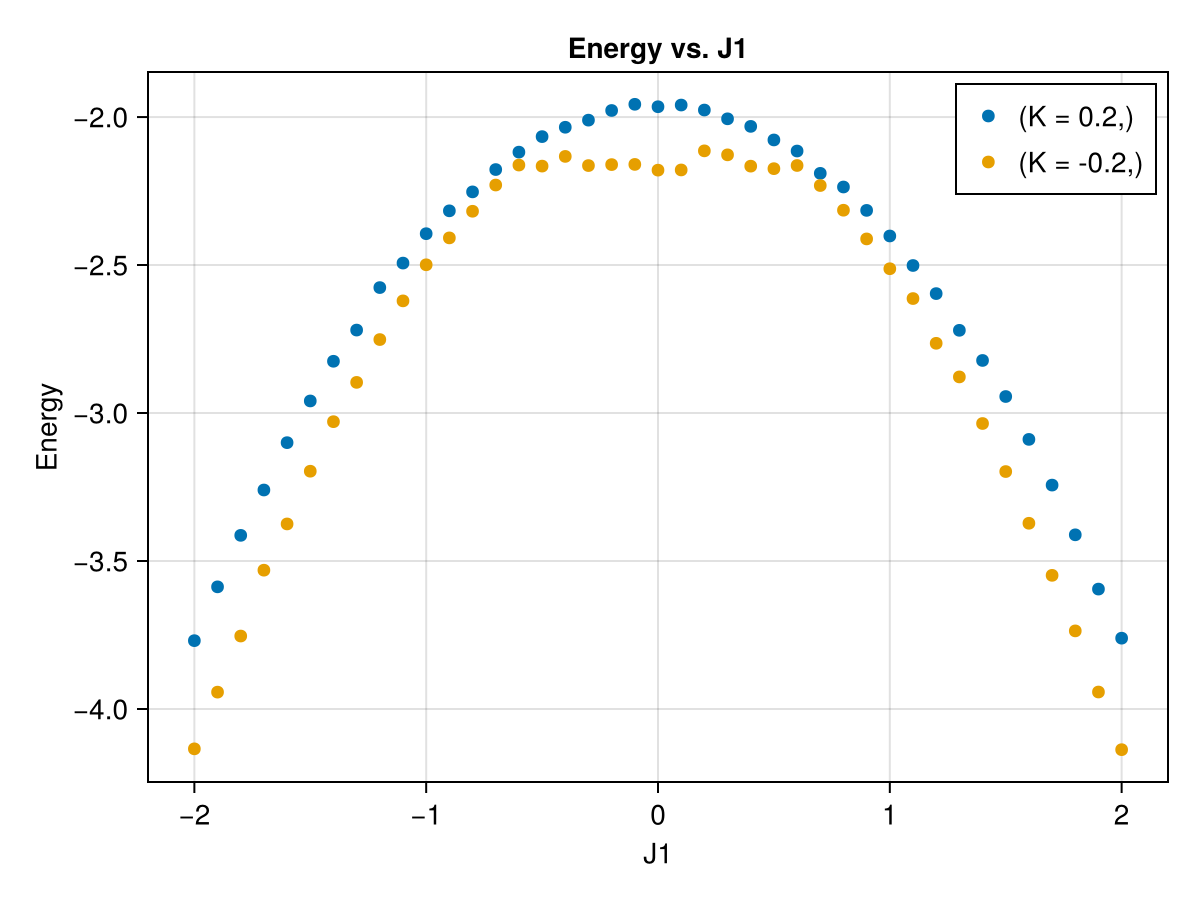

In [120]:
generatePlot(
    data, :J1, :Energy;
    title="Energy vs. J1",
    xlabel="J1",
    ylabel="Energy"
)

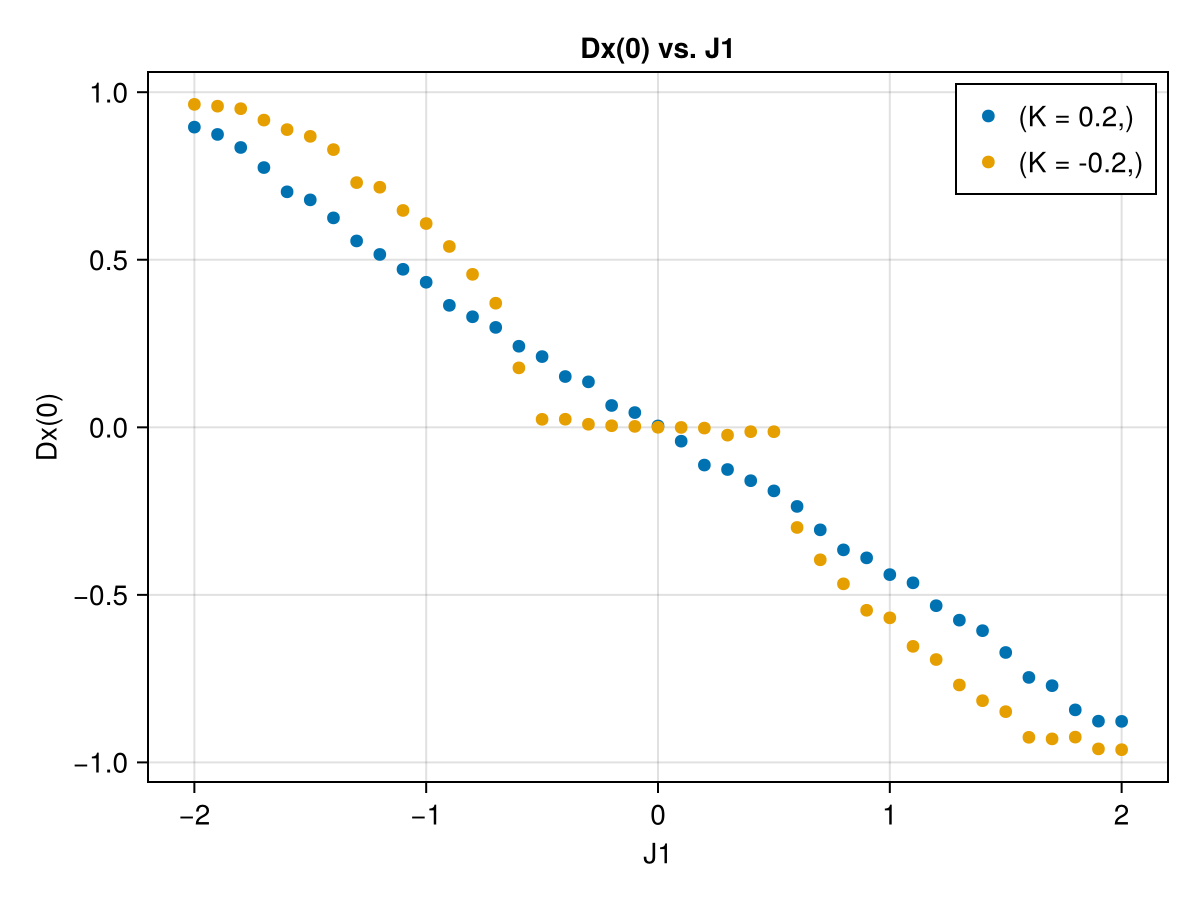

In [121]:
generatePlot(
    data, :J1, :Dx0;
    title="Dx(0) vs. J1",
    xlabel="J1",
    ylabel="Dx(0)"
)

In [122]:
jobname = "j1-fine-sweep"
fine_data = groupby(cleandata("../jobs/" * jobname * ".results.json"), [:K])

Row,J1,K,Lx,Ly,Mag,Energy,Dx0,Dy0
,Float64,Float64,Int64,Int64,Measurem…,Measurem…,Measurem…,Measurem…
1,-1.0,0.2,40,40,0.00595±0.00036,-2.41219±0.00023,0.45468±0.0003,0.46616±0.00036
2,-0.95,0.2,40,40,0.00908±0.00044,-2.35777±0.00025,0.40957±0.00062,0.4602±0.00022
3,-0.9,0.2,40,40,0.01075±0.00042,-2.30135±9.9e-5,0.40039±0.00054,0.45108±0.00041
4,-0.85,0.2,40,40,0.00662±0.00043,-2.2784±0.0012,0.3465±0.0011,0.43726±0.00062
5,-0.8,0.2,40,40,0.00842±0.00041,-2.23656±0.00011,0.33083±0.00042,0.3682±0.00024
6,-0.75,0.2,40,40,0.0054±0.00034,-2.19523±0.00016,0.31255±0.00036,0.34264±0.00019
7,-0.7,0.2,40,40,0.00333±0.00035,-2.18768±0.00022,0.29475±0.00038,0.3261±0.00023
8,-0.65,0.2,40,40,0.00363±0.00013,-2.15623±7.3e-5,0.2673±0.0004,0.30755±0.00017
9,-0.6,0.2,40,40,0.0029±0.00016,-2.12956±0.00016,0.27447±0.00028,0.30539±0.00021


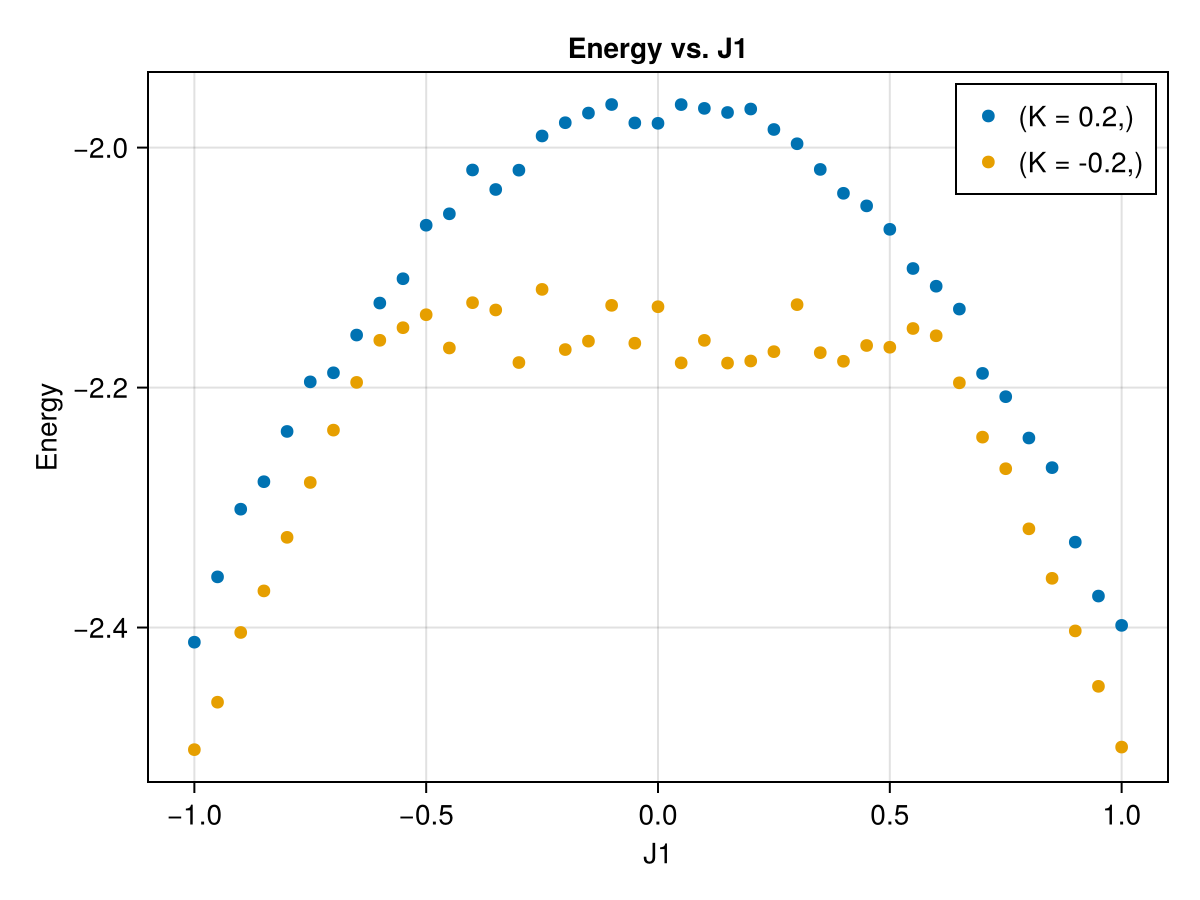

In [123]:
fig = generatePlot(
    fine_data, :J1, :Energy;
    title="Energy vs. J1",
    xlabel="J1",
    ylabel="Energy"
)
save("j1-plots/j1-energy.png", fig)
fig

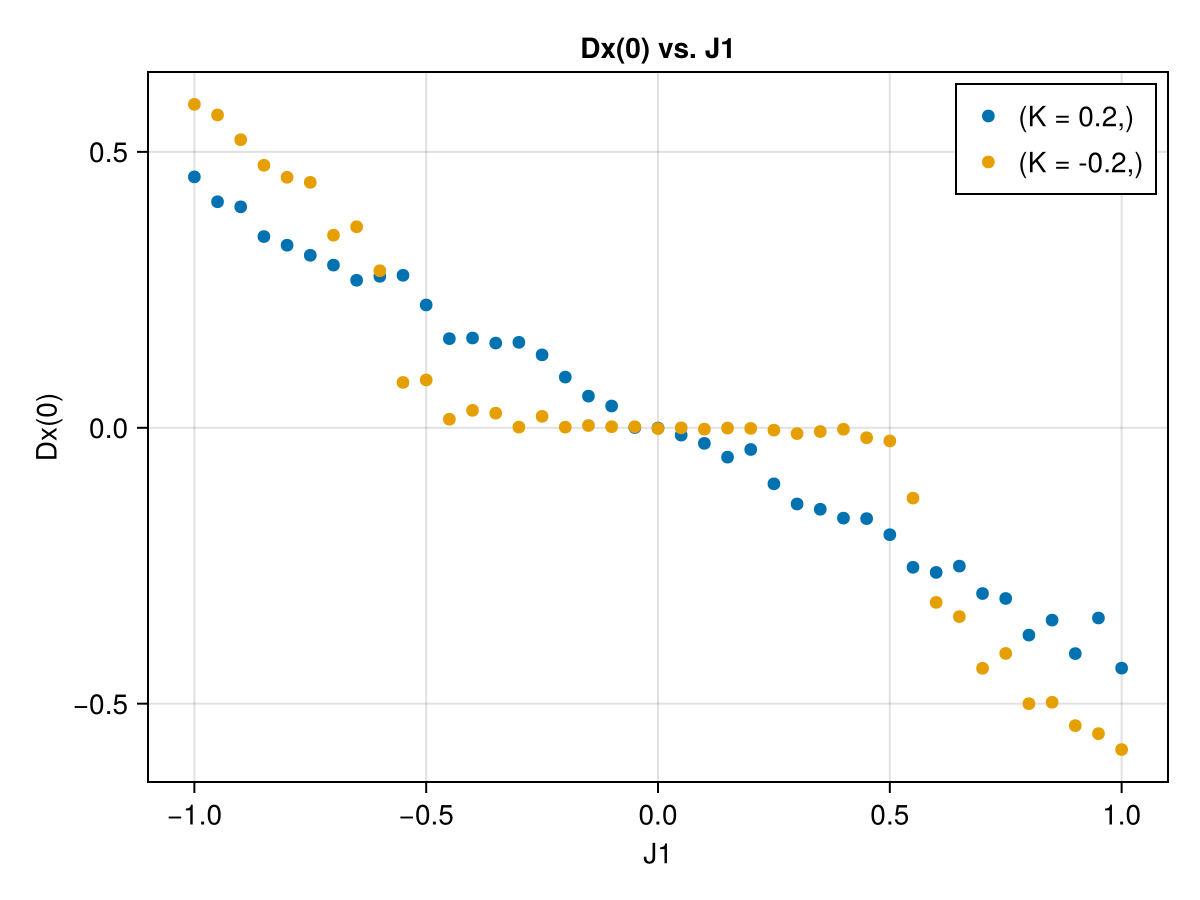

In [124]:
fig = generatePlot(
    fine_data, :J1, :Dx0;
    title="Dx(0) vs. J1",
    xlabel="J1",
    ylabel="Dx(0)"
)
save("j1-plots/j1-Dx0.png", fig)
fig

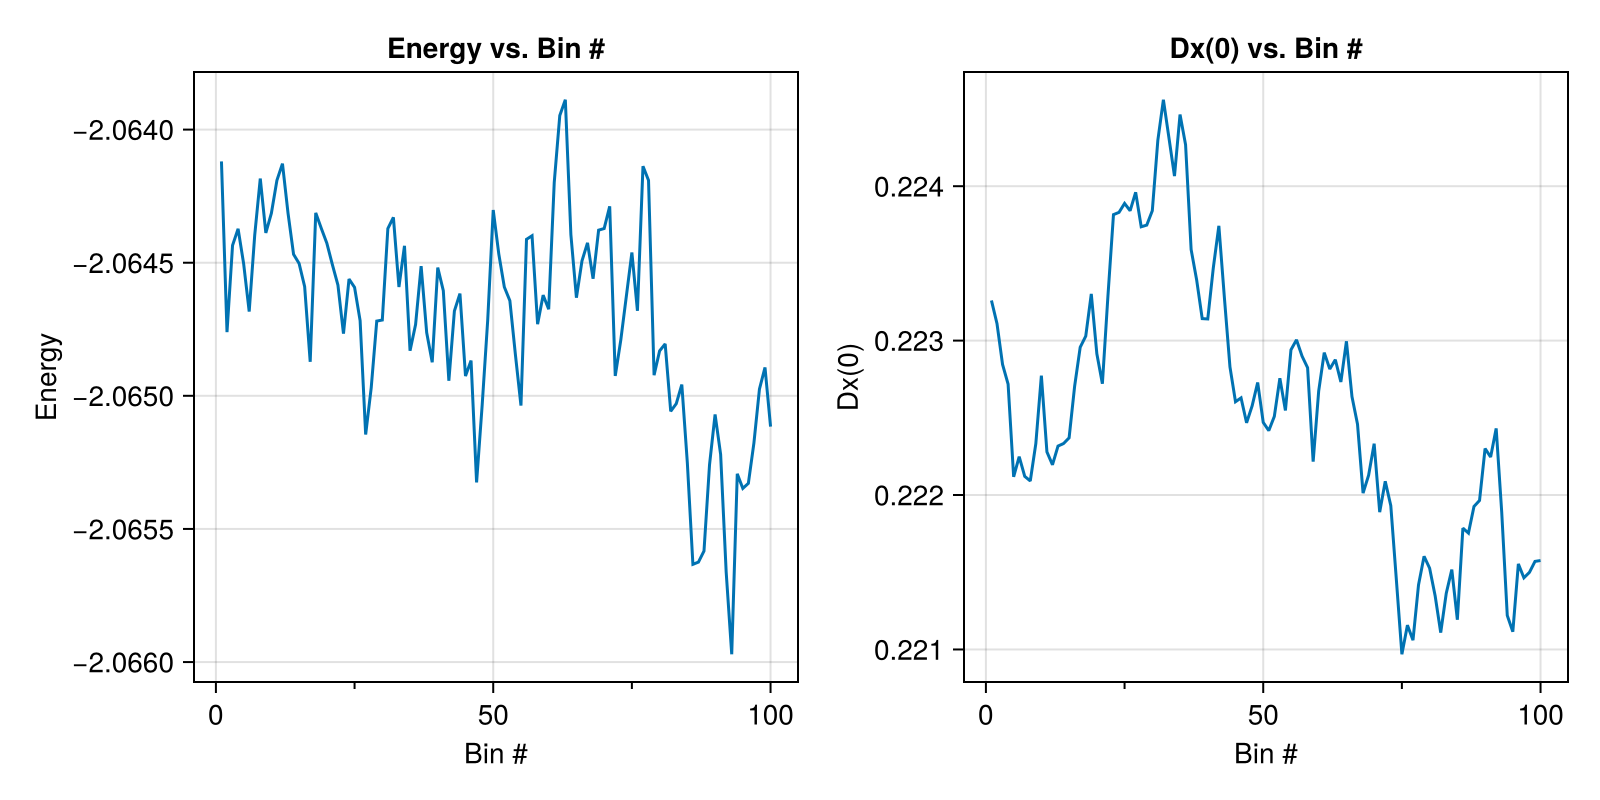

In [ ]:
fig = Figure(size=(800, 400))

ax_energy = fig[1,1] = Axis(
    fig,
    title="Energy vs. Bin #",
    xlabel="Bin #",
    ylabel="Energy",
    xminorticksvisible=true
)
ax_Dx0 = fig[1,2] = Axis(
    fig,
    title="Dx(0) vs. Bin #",
    xlabel="Bin #",
    ylabel="Dx(0)",
    xminorticksvisible=true
)

task_no = "21"
jobname = "j1-fine-sweep"
h5open("../jobs/" * jobname * ".data/task00" * task_no * "/run0001.meas.h5") do file
    observables = file["observables"]
    energy_samples = read(observables, "Energy/samples")
    n = length(energy_samples)
    init = 1
    lines!(
        ax_energy,
        collect(init:n),
        energy_samples[init:n],
    )
    Dx0_samples = read(observables, "Dx0/samples")
    lines!(
        ax_Dx0,
        collect(init:n),
        Dx0_samples[init:n],
    )
end

fig

In [126]:
task_no = "42"
file = h5open("../jobs/j1-fine-sweep.data/task00" * task_no * "/run0001.dump.h5")
spins = map(
    t -> [t[:data][1], t[:data][2], t[:data][3]],
    read(file, "simulation/spins")
)
spin_xs = map(v -> v[1], spins)
spin_ys = map(v -> v[2], spins)
spin_zs = map(v -> v[3], spins)
Lx, Ly = size(spins)
close(file)

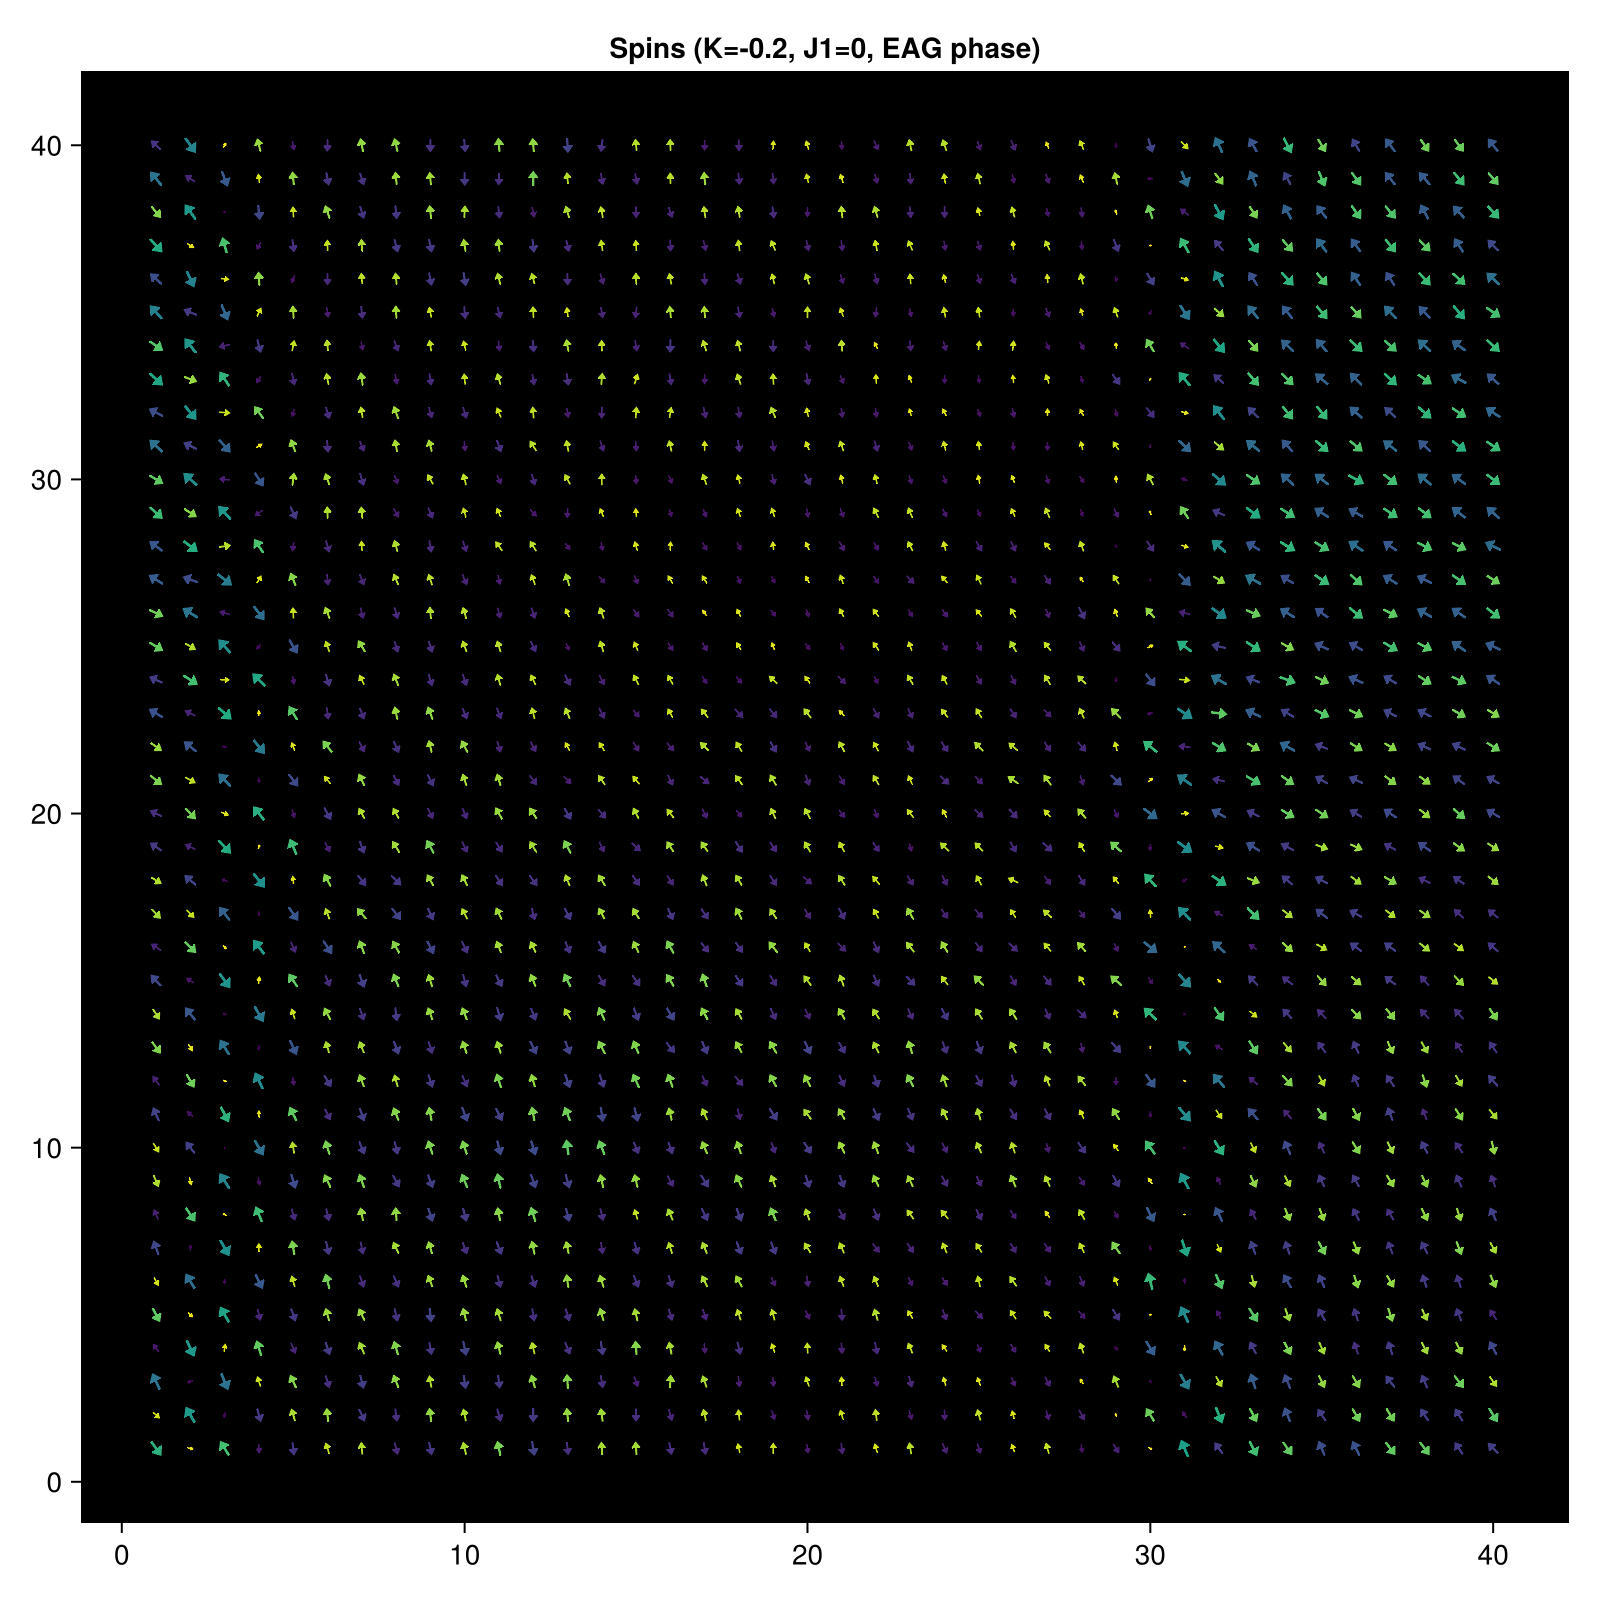

In [127]:
fig = Figure(size=(800, 800))
fig[1,1] = Axis(fig; title="Spins (K=-0.2, J1=0, EAG phase)", backgroundcolor="black")

strength = vec(spin_zs)
arrows2d!(1:Lx, 1:Ly, spin_xs, spin_ys, lengthscale=0.5, align=:center, color=strength)
fig